<a href="https://colab.research.google.com/github/vivek16pawar/World-Health-EDA/blob/main/World_Health_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download and import datasets
- download data from kaggle
- import libraries
- create dataframe

In [7]:
pip install opendatasets --upgrade --quiet

In [8]:
download_url = 'https://www.kaggle.com/utkarshxy/who-worldhealth-statistics-2020-complete'

In [9]:
import opendatasets as od
od.download(download_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: vivek16pawar
Your Kaggle Key: ··········


100%|██████████| 1.37M/1.37M [00:00<00:00, 93.7MB/s]

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

# Alcohol Substance Abuse and Tobacco

In [23]:
alch_df = pd.read_csv('/content/who-worldhealth-statistics-2020-complete/alcoholSubstanceAbuse.csv')
tobb_df = pd.read_csv('/content/who-worldhealth-statistics-2020-complete/tobaccoAge15.csv')

##Data Preparation and Cleaning
- look at data
- info
- describe
- missing values

### Alcohol
- data is for age 15+

In [13]:
alch_df.head()

,Location,Period,Indicator,Dim1,First Tooltip
0,Afghanistan,2018,Total (recorded+unrecorded) alcohol per capita...,Both sexes,0.210
1,Afghanistan,2018,Total (recorded+unrecorded) alcohol per capita...,Male,0.360
2,Afghanistan,2018,Total (recorded+unrecorded) alcohol per capita...,Female,0.055
3,Afghanistan,2015,Total (recorded+unrecorded) alcohol per capita...,Both sexes,0.210
4,Afghanistan,2015,Total (recorded+unrecorded) alcohol per capita...,Male,0.350


In [14]:
alch_df.tail()

,Location,Period,Indicator,Dim1,First Tooltip
2782,Zimbabwe,2005,Total (recorded+unrecorded) alcohol per capita...,Male,4.72
2783,Zimbabwe,2005,Total (recorded+unrecorded) alcohol per capita...,Female,0.99
2784,Zimbabwe,2000,Total (recorded+unrecorded) alcohol per capita...,Both sexes,2.46
2785,Zimbabwe,2000,Total (recorded+unrecorded) alcohol per capita...,Male,4.16
2786,Zimbabwe,2000,Total (recorded+unrecorded) alcohol per capita...,Female,0.88


In [32]:
alch_df['Indicator'].unique()

array(['Total (recorded+unrecorded) alcohol per capita (15+) consumption'],
      dtype=object)

In [19]:
alch_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2787 entries, 0 to 2786
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       2787 non-null   object 
 1   Period         2787 non-null   int64  
 2   Indicator      2787 non-null   object 
 3   Dim1           2787 non-null   object 
 4   First Tooltip  2787 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 109.0+ KB


In [22]:
alch_df.Period.value_counts()

2018    564
2015    564
2010    561
2005    549
2000    549
Name: Period, dtype: int64

### Tobacco
- data is for tobacco smoking among persons aged 15 years and older

In [24]:
tobb_df.head()

,Location,Indicator,Period,Dim1,First Tooltip
0,Albania,Age-standardized prevalence of current tobacco...,2018,Both sexes,29.2
1,Albania,Age-standardized prevalence of current tobacco...,2018,Male,50.5
2,Albania,Age-standardized prevalence of current tobacco...,2018,Female,7.9
3,Albania,Age-standardized prevalence of current tobacco...,2017,Both sexes,29.3
4,Albania,Age-standardized prevalence of current tobacco...,2017,Male,50.6


In [25]:
tobb_df.tail()

,Location,Indicator,Period,Dim1,First Tooltip
4018,Zimbabwe,Age-standardized prevalence of current tobacco...,2005,Male,31.6
4019,Zimbabwe,Age-standardized prevalence of current tobacco...,2005,Female,2.3
4020,Zimbabwe,Age-standardized prevalence of current tobacco...,2000,Both sexes,18.3
4021,Zimbabwe,Age-standardized prevalence of current tobacco...,2000,Male,33.7
4022,Zimbabwe,Age-standardized prevalence of current tobacco...,2000,Female,2.9


In [26]:
tobb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4023 entries, 0 to 4022
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       4023 non-null   object 
 1   Indicator      4023 non-null   object 
 2   Period         4023 non-null   int64  
 3   Dim1           4023 non-null   object 
 4   First Tooltip  4023 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 157.3+ KB


In [27]:
tobb_df.describe()

,Period,First Tooltip
count,4023.000000,4023.000000
mean,2012.000000,24.807159
std,5.657557,15.745702
min,2000.000000,0.000000
25%,2010.000000,12.600000
50%,2014.000000,23.900000
75%,2016.000000,34.600000
max,2018.000000,91.000000


In [31]:
tobb_df.Period.value_counts()

2018    447
2017    447
2016    447
2015    447
2014    447
2013    447
2010    447
2005    447
2000    447
Name: Period, dtype: int64

In [33]:
tobb_df['Indicator'].unique()

array(['Age-standardized prevalence of current tobacco smoking among persons aged 15 years and older'],
      dtype=object)

In [34]:
alch_df.drop(['Indicator'], axis=1, inplace = True)
tobb_df.drop(['Indicator'], axis=1, inplace = True)

# Exploratory Data Analysis and Visualaztion

## Tobacco

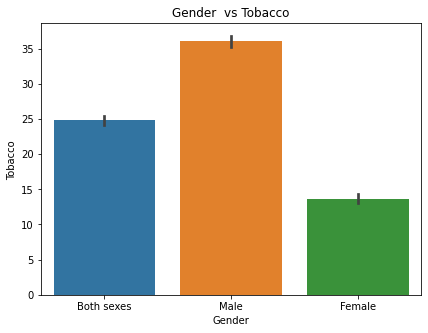

In [75]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(tobb_df.Dim1,tobb_df['First Tooltip'])
plt.title('Gender  vs Tobacco')
plt.xlabel('Gender')
plt.ylabel('Tobacco ')
plt.show()


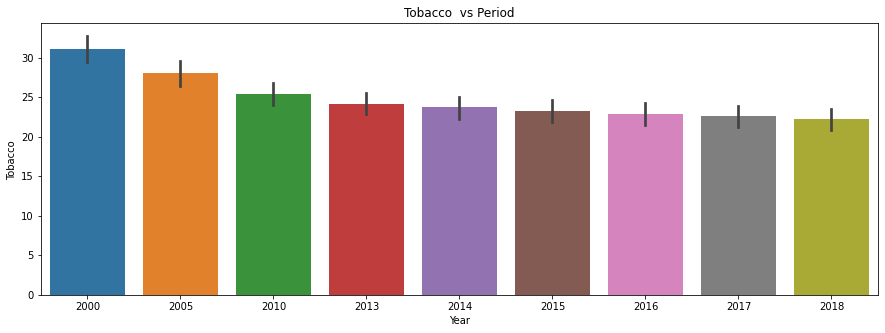

In [51]:
plt.figure(figsize=(15,5))
sns.barplot(tobb_df.Period,tobb_df['First Tooltip'])
plt.title('Tobacco  vs Period')
plt.xlabel('Year')
plt.ylabel('Tobacco ')
plt.show()

## Alcohol

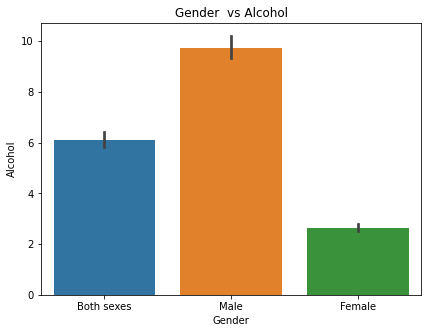

In [76]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,2)
sns.barplot(alch_df.Dim1,alch_df['First Tooltip'])
plt.title('Gender  vs Alcohol')
plt.xlabel('Gender')
plt.ylabel('Alcohol')
plt.show()

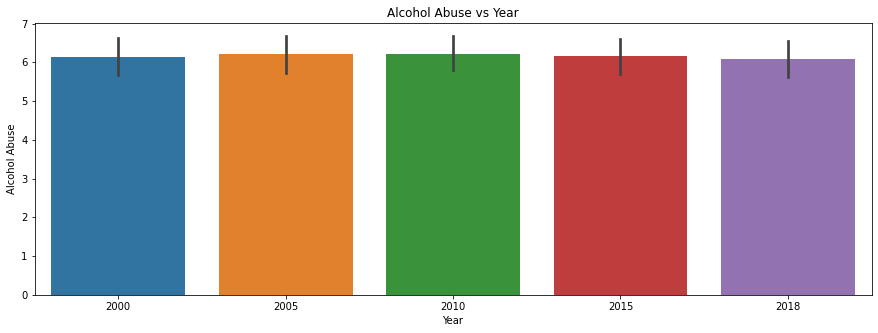

In [50]:
plt.figure(figsize=(15,5))
sns.barplot(alch_df.Period,alch_df['First Tooltip'])
plt.title('Alcohol Abuse vs Year')
plt.xlabel('Year')
plt.ylabel('Alcohol Abuse')
plt.show()

There is decrease in the trend of tobbaco consumption

Tobacco consumption is slightly more for Females than Alcohol

In [63]:
tobb_country = tobb_df.groupby('Location')['First Tooltip'].mean().sort_values(ascending = False).reset_index()
tobb_country

,Location,First Tooltip
0,Nauru,57.933333
1,Kiribati,56.948148
2,Tuvalu,52.996296
3,Myanmar,50.907407
4,Chile,47.381481
...,...,...
144,Niger,8.281481
145,Sao Tome and Principe,5.688889
146,Nigeria,5.514815
147,Ethiopia,5.285185


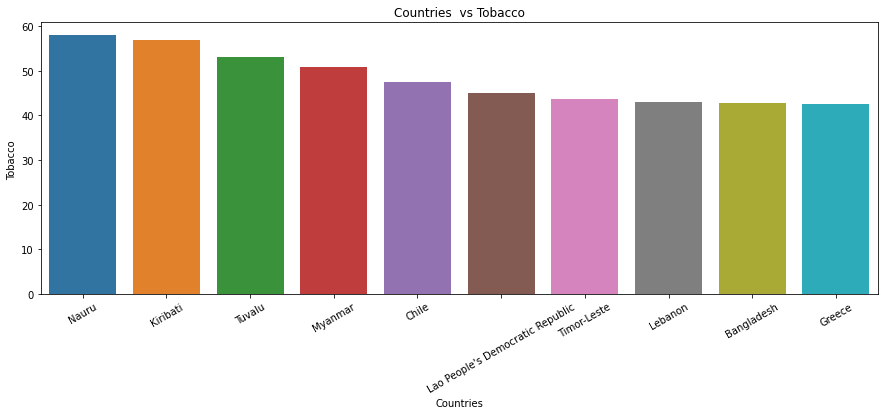

In [74]:
plt.figure(figsize=(15,5))
sns.barplot(tobb_country.Location[:10],tobb_country['First Tooltip'])
plt.title('Countries  vs Tobacco')
plt.xlabel('Countries')
plt.ylabel('Tobacco ')
plt.xticks(rotation=30)
plt.show()

In [71]:
alch_country = alch_df.groupby('Location')['First Tooltip'].mean().sort_values(ascending = False).reset_index()
alch_country

,Location,First Tooltip
0,Lithuania,15.172000
1,Russian Federation,15.052667
2,Republic of Moldova,14.824667
3,Belarus,14.730000
4,Czechia,14.654000
...,...,...
183,Bangladesh,0.117200
184,Mauritania,0.097600
185,Somalia,0.074467
186,Libya,0.058067


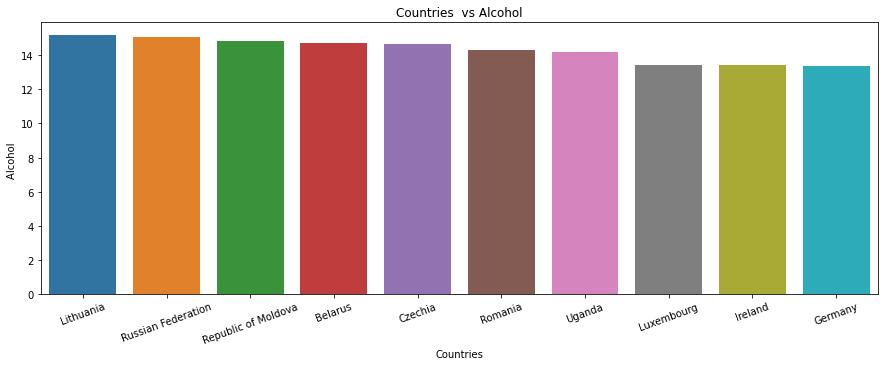

In [72]:
plt.figure(figsize=(15,5))
sns.barplot(alch_country.Location[:10],alch_country['First Tooltip'])
plt.title('Countries  vs Alcohol')
plt.xlabel('Countries')
plt.ylabel('Alcohol ')
plt.xticks(rotation=20)
plt.show()

# Question and Answers

# Conclusion and Summery